In [10]:
import matplotlib.pyplot  as plt
import numpy as np 
from pycqed.analysis.plotting_tools import latexify
from quantify.visualization.mpl_plotting import set_xlabel, set_ylabel, set_cbarlabel
from pycqed.analysis.plotting_tools import flex_colormesh_plot_vs_xy, set_axeslabel_color
import matplotlib


In [2]:
def depth(n, eps): 
    return 1/(n*eps)

def quantumVolume(n, eps):
    VQ = 2**(np.minimum(n, depth(n, eps)))
    return VQ

def quantumVolume_log(n, eps):
    log_VQ = (np.minimum(n, depth(n, eps)))
#     log_VQ = np.min([n, 1/(n*eps)])
    return log_VQ

def quantumVolume_grid(n, eps):
    log_VQ = (np.minimum(n, 1/(n*eps*np.sqrt(n))))
#     log_VQ = np.min([n, 1/(n*eps)])
    return log_VQ


# def quantumVolume_log_depth(n, eps):
# #     VQ = (np.minimum(n, depth(n, eps)))
#     d = 1/(n*eps)
#     return d

# def quantumVolume_log_width(n, eps):
# #     VQ = (np.minimum(n, depth(n, eps)))
#     n
#     return n

In [3]:
n = np.logspace(0,5, 100)
eps = np.logspace(-1, -6, 120)


# filling the heatmap, value by value
fun_map = np.empty((n.size, eps.size))
fun_map_g = np.empty((n.size, eps.size))
x_grid =np.empty((n.size, eps.size))
y_grid = np.empty((n.size, eps.size))
# fun_map_n = np.empty((n.size, eps.size))
for i in range(n.size):
    for j in range(eps.size):
        fun_map[i,j] = quantumVolume_log(n=n[i], eps=eps[j])
        fun_map[i, j] = np.max([fun_map[:i+1,j]]) # argmax part of defintion
        fun_map_g[i,j] = quantumVolume_grid(n=n[i], eps=eps[j])
        fun_map_g[i, j] = np.max([fun_map_g[:i+1,j]]) # argmax part of defintion
        
        x_grid[i,j] = n[i]
        y_grid[i,j] = eps[i]
        
fun_map = fun_map.T
fun_map_g = fun_map_g.T
        

/usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


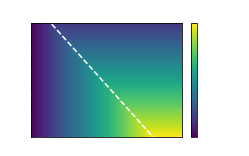

In [11]:
latexify()
f, ax = plt.subplots()
f.patch.set_alpha(0)
flex_colormesh_plot_vs_xy(n, eps, fun_map, ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

d = flex_colormesh_plot_vs_xy(n, eps, fun_map, ax=ax, clim=(10, 600), cmap='viridis')
cbar = plt.colorbar(d['cmap'], ax=ax)
set_xlabel(ax, 'Number of qubits, $n$')
set_ylabel(ax, 'Effective error rate, $\epsilon_{\mathrm{eff}}(n)$')
set_cbarlabel(cbar, '$\log _2 (V_\mathrm{Q})$')


ax.plot(n, 1/n**2, c='white', ls='--')
ax.set_xlim(1, 5000)
ax.set_ylim(1e-6,1e-1)

import matplotlib.ticker as ticker
@ticker.FuncFormatter
def major_formatter(x, pos):
    return "%.f" % x
ax.xaxis.set_major_formatter(major_formatter)

norm = matplotlib.colors.LogNorm(vmin=1,vmax=10**3)
d['cmap'].set_norm(norm)
# f.savefig('quantum_volume.pdf', bbox_inches='tight')
f.savefig('quantum_volume.svg', bbox_inches='tight')
f.savefig('quantum_volume.png', bbox_inches='tight', dpi=450)
set_axeslabel_color(ax, 'white')
set_axeslabel_color(cbar.ax, 'white')
# f.savefig('quantum_volume_w.png', bbox_inches='tight', dpi=450)

In [12]:
import pandas as pd

In [69]:
df = pd.DataFrame(columns=['Reference', '# qubits', '2Q fidelity', 'year', "notes", 'connectivity', "url"])


df.loc['Google 2014']=["Barends et al. Nature", 5, 0.99, 2014, "line", "","https://www.nature.com/articles/nature13171"]
df.loc['QuTech 2015']=["Riste et al. Nature comm.", 5, np.nan, 2014, "line", "","https://www.nature.com/articles/nature13171"]
df.loc['Google 2015']=["Kelly et al. Nature", 9, np.nan, 2015, "line", "","https://www.nature.com/articles/nature14270"]
df.loc['IBM 2015']=["Corcoles et al. Nature comm.", 4, 0.94, 2015, "square", "","https://www.nature.com/articles/ncomms7979#citeas"]

df.loc['IBM 2016']=["IBM Quantum Experience", 5, np.nan, 2016, "star", "Original IBM Q device","unknown"]
df.loc['IBM 2016b']=["Sheldon et al. Phys Rev A.", 2, 0.99, 2016, "line", "","https://journals.aps.org/pra/abstract/10.1103/PhysRevA.93.060302"]
df.loc['Rigetti 2017']=["Otterbach et al. arXiv 1712.05771", 19, 0.875, 2017, "hexagonal", "","https://arxiv.org/pdf/1712.05771.pdf"]
df.loc['IBM 2017'] = ["IBM tech review 2017", 50, np.nan, 2017, "unknown", "","https://www.technologyreview.com/2017/11/10/147728/ibm-raises-the-bar-with-a-50-qubit-quantum-computer/"]
df.loc['Google 2018'] = ["Kelly 2018", 72, np.nan, 2018, "square", "","https://ai.googleblog.com/2018/03/a-preview-of-bristlecone-googles-new.html"]
df.loc['Intel/QuTech 2018'] = ["Intel/QuTech 2018", 49, np.nan, 2018, "square", "","https://newsroom.intel.com/news/future-quantum-computing-counted-qubits/#gs.wf1rpr"]
df.loc['ETH 2018'] = ["Heinsoo et al. Phys. Rev. Applied", 8, np.nan, 2018, "square", "","https://journals.aps.org/prapplied/abstract/10.1103/PhysRevApplied.10.034040"]
df.loc['Rigetti 2019']=["Hong et al. Phys Rev A. ", 7, 0.982, 2017, "octogonal", "","https://journals.aps.org/pra/abstract/10.1103/PhysRevA.101.012302"]
df.loc['ETH 2019']=["Kraglund Andersen et al. npj Quantum Info.", 4, 0.991, 2020, "line", "","https://www.nature.com/articles/s41534-019-0185-4"]
df.loc['Google 2019']=["Arute et al. Nature.", 53, 0.991, 2019, "square", "","https://www.nature.com/articles/s41534-019-0185-4"]
df.loc['IBM 2019']=["Cross et al. Phys Rev A.", 20, 0.989, 2019, "complicated", "Multiple devices shown in paper with different fidelities and connectivity","https://journals.aps.org/pra/abstract/10.1103/PhysRevA.100.032328"]
df.loc['Intel/QuTech 2019'] = ["Sagastizabal et al. Phys Rev A.", 7, 0.9873, 2019, "square", "fidelity as average of mean fidelity of Negirneac et al. arXiv 2008:07411","https://journals.aps.org/pra/abstract/10.1103/PhysRevA.100.010302"]
df.loc['QuTech 2020']=["Bultink et al. Science Adv.", 3, 0.986, 2020, "line", "","https://advances.sciencemag.org/content/6/12/eaay3050/tab-pdf"]
df.loc['IBM 2020']=["Jurcevic et al. Science Adv.", 27, 0.9936, 2020, "heavy-hex", "","https://arxiv.org/pdf/2008.08571.pdf"]
df.loc['IBM 2020a']=["IBM Quantum.", 53, np.nan, 2020, "", "Rochester device, need to find the proper reference",""]
df.loc['IBM 2020b']=["IBM Quantum.", 65, np.nan, 2020, "", "Hummingbird device, need to find the proper reference","https://medium.com/qiskit/researchers-make-quantum-material-using-53-qubit-ibm-quantum-processor-and-qiskit-aa63c9c64dc"]
df.loc['Rigetti 2021']=["Gold et al. arXiv:2102.13293", 32, 0.911, 2021, "complicated", "Entanglement between different chip dies","https://arxiv.org/pdf/2102.13293.pdf"]
df.loc['Google 2021']=["Chen et al. arXiv:2102.06132.", 54, 0.993, 2021, "square", "","https://arxiv.org/pdf/2102.06132.pdf"]
df

,Reference,# qubits,2Q fidelity,year,notes,connectivity,url
Google 2014,Barends et al. Nature,5,0.9900,2014,line,,https://www.nature.com/articles/nature13171
QuTech 2015,Riste et al. Nature comm.,5,NaN,2014,line,,https://www.nature.com/articles/nature13171
Google 2015,Kelly et al. Nature,9,NaN,2015,line,,https://www.nature.com/articles/nature14270
IBM 2015,Corcoles et al. Nature comm.,4,0.9400,2015,square,,https://www.nature.com/articles/ncomms7979#citeas
IBM 2016,IBM Quantum Experience,5,NaN,2016,star,Original IBM Q device,unknown
IBM 2016b,Sheldon et al. Phys Rev A.,2,0.9900,2016,line,,https://journals.aps.org/pra/abstract/10.1103/...
Rigetti 2017,Otterbach et al. arXiv 1712.05771,19,0.8750,2017,hexagonal,,https://arxiv.org/pdf/1712.05771.pdf
IBM 2017,IBM tech review 2017,50,NaN,2017,unknown,,https://www.technologyreview.com/2017/11/10/14...
Google 2018,Kelly 2018,72,NaN,2018,square,,https://ai.googleblog.com/2018/03/a-preview-of...
Intel/QuTech 2018,Intel/QuTech 2018,49,NaN,2018,square,,https://newsroom.intel.com/news/future-quantum...


In [20]:
Fids_Rig = [0.936,
    0.889,
    0.888,
    0.919,
    0.817,
    0.906,
    0.854,
    0.870,
    0.838,
    0.870,
    0.881,
    0.872,
    0.854,
    0.838,
    0.891,
    0.844,
    0.876,
    0.886,
    0.936,
    0.921,
    0.797]
np.mean(Fids_Rig)

0.8753809523809524

In [51]:
np.mean([98.34,
    90.09,
    82.70,
    96.04,
    84.63,
    97.47,
    87.08,
    97.26,
    80.68,
    96.78])

91.107